In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# NN=related
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD,Adam

# dataset
from keras.datasets import mnist

#something useful
from keras.utils import to_categorical

Using TensorFlow backend.


### 讀取資料

In [3]:
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()
print('共 %d 訓練資料，每筆資料尺寸為 %d x %d' %x_train0.shape)

共 60000 訓練資料，每筆資料尺寸為 28 x 28


### reshape 變成784維向量

In [4]:
x_train = x_train0.reshape(60000,784)
x_test = x_test0.reshape(10000,784)

### 做正規化 (資料 - 最小值)/(最大值 - 最小值)

In [5]:
x_train -= x_train.min()
x_train = x_train/x_train.max()  #正規化

x_test -= x_test.min()
x_test = x_test/x_test.max()  #正規化

In [6]:
[x_train.min(),x_train.max()],[x_test.min(),x_test.max()] #確認是否完成正規化

([0.0, 1.0], [0.0, 1.0])

### 將輸出的結果進行10維分類

In [7]:
y_train_num=to_categorical(y_train0,10)
y_test_num=to_categorical(y_test0,10)  #one-hot encoding(分類)

In [8]:
y_train_num[0],y_test_num[0] #測試資料是否正確

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

## 用Functional API 形式架設神經網路

### 第一層用700個神經元，第二層分別用350個神經元 Activation=relu，250個神經元Activation=sigmoid
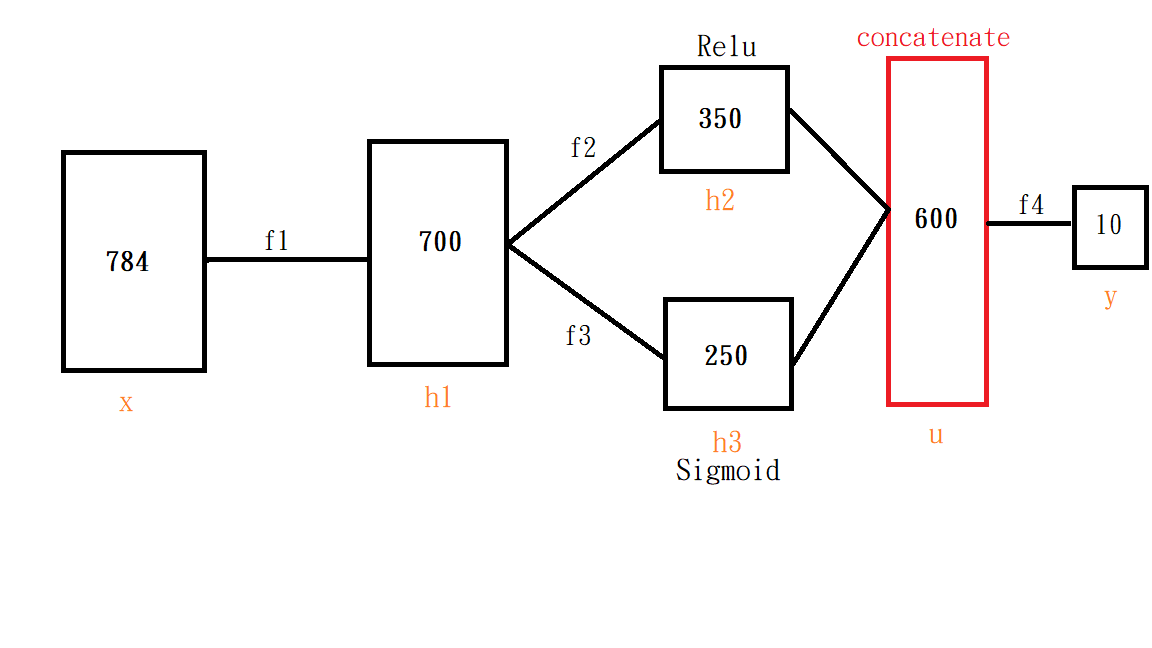

In [9]:
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

In [10]:
x=Input(shape=(784,))

In [11]:
f_1=Dense(700, activation='sigmoid') #784->500 維度變化
f_2=Dense(350, activation='relu')    #700->350
f_3=Dense(250, activation='sigmoid')  #700->250
f_4=Dense(10, activation='softmax')  #600->10

In [12]:
h_1=f_1(x)
h_2=f_2(h_1)
h_3=f_3(h_1)
u=concatenate([h_2, h_3])
y=f_4(u)

In [13]:
model=Model(x,y)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = SGD(lr=0.09),
              metrics = ["accuracy"])

In [14]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 700)          549500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 350)          245350      dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 250)          175250      dense_1[0][0]                    
__________________________________________________________________________________________________
concatenat

In [15]:
model_1=model.fit(x_train,y_train_num,batch_size=100,epochs=20,verbose=1,validation_data=(x_test, y_test_num))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.9179 - acc: 0.6963 - val_loss: 0.4633 - val_acc: 0.8444
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3756 - acc: 0.8887 - val_loss: 0.3190 - val_acc: 0.9063
Epoch 3/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.3142 - acc: 0.9064 - val_loss: 0.2703 - val_acc: 0.9211
Epoch 4/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.2797 - acc: 0.9170 - val_loss: 0.2415 - val_acc: 0.9304
Epoch 5/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.2510 - acc: 0.9252 - val_loss: 0.2556 - val_acc: 0.9282
Epoch 6/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.2289 - acc: 0.9314 - val_loss: 0.2077 - val_acc: 0.9403
Epoch 7/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.2109 - acc: 0.9377 - val_loss: 0.1909 - val_acc

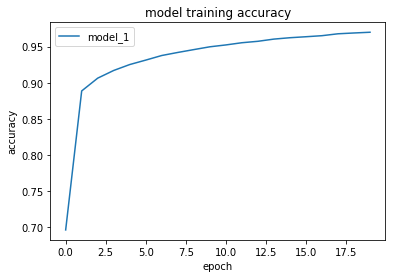

In [17]:
plt.plot(model_1.history['acc'])
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch') #訓練次數
plt.legend(['model_1'],loc='best')
plt.show()

In [19]:
score=model.evaluate(x_test,y_test_num)
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1]*100)

10000/10000 [==============================] - 0s 38us/step
測試資料的 loss: 0.11100991683229804
測試資料正確率: 96.54
